# Task 3 - Regularization and Tuning

As a part of this task, we just went in with simple parameter tuning but we found a good range of learning rate decay (momentum) that improved the results for the gradient descent optimizer. In this task, we didn't find dropout to be really useful as it in this case actually reduced the accuracy, which indicates underfitting.

 1. Learning rate decay (momentum) can actually counter the zig zag nature of the gradient oscillations. The effect can be described as such that learning takes large steps in beginning towards the minimum,and if the gradients are a slightly noisy then it will avoid moving far off the minima since the steps will get smaller and the gradient will oscillate in a smaller area around the minimum. If the learning rate is static there is a risk that if the gradient is noisy, the learning will move far away from the minima in some iterations. 
 3. Dropout means that during training some neurons are randomly set to 0 for each training example The intuition behind dropout as a regularization technique is that it hinders neurons in the network from adapting too strongly
 on the output of the prior layer, as those networks will not always be present during training.
 
 Base learning rate: 0.5
Decay: 0.96 decay every 50 samples
Dropout-prob: 0.1
Dropout-layer: first only

No decay & No dropout
Final test accuracy 0.1
Final test loss nan

Decay & No dropout
Final test accuracy 0.8745
Final test loss 0.346231

Decay & dropout
Final test accuracy 0.6761
Final test loss 0.808773



In [26]:
from __future__ import print_function
# all tensorflow api is accessible through this
import tensorflow as tf
import numpy as np
# to visualize the results
import matplotlib.pyplot as plt
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data

# Enable deterministic comparisons between executions
tf.set_random_seed(0)

#Initializing values for the constants used below
IMAGE_SIZE = 28
IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE
NUM_CLASSES = 10
GD_LEARNING_RATE = 0.5
ADAM_LEARNING_RATE = 0.005
NUM_HIDDEN_1 = 200
NUM_HIDDEN_2 = 100
NUM_HIDDEN_3 = 60
NUM_HIDDEN_4 = 30
DROPOUT_RATE = 0.1

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
y = 7 (Sneaker)


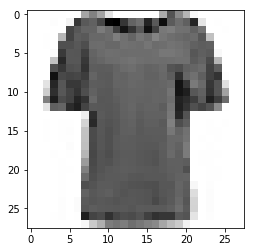

y = 1 (Trouser)


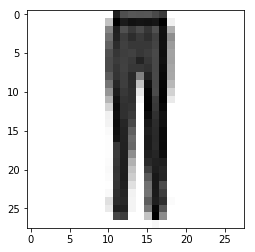

Number of train examples in dataset 55000
Number of test examples in dataset 10000
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)


In [27]:
# load data
tf.set_random_seed(0)
# load data
mnist = input_data.read_data_sets('data/fashion', one_hot=True)

# Just used for personal reference
label_dict = {
 0: 'T-shirt-top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

#Checking to see if we got the right data set.
# Get 28x28 image
sample_1 = mnist.train.images[123].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(mnist.train.labels[183] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()

# Sample 2

# Get 28x28 image
sample_2 = mnist.train.images[190].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_2 = np.where(mnist.train.labels[190] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')
plt.show()

print('Number of train examples in dataset ' + str(len(mnist.train.labels)))
print('Number of test examples in dataset ' + str(len(mnist.test.labels)))
print("Training set (images) shape: {shape}".format(shape= mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=mnist.train.labels.shape))

In [30]:
# Define placeholders for input data and for input truth labels
x = tf.placeholder(tf.float32,
                   [None, IMAGE_SIZE, IMAGE_SIZE, 1])  # training examples (just one color channel, i.e grayscale)
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])  # correct answers(labels)

# Define variables for the parameters of the model: Weights and biases, random-initialization with gaussian dist.
w_1 = tf.Variable((tf.truncated_normal([784, NUM_HIDDEN_1], stddev=0.1)))
b_1 = tf.Variable(tf.zeros([NUM_HIDDEN_1]))

w_2 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_1, NUM_HIDDEN_2], stddev=0.1)))
b_2 = tf.Variable(tf.zeros([NUM_HIDDEN_2]))

w_3 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_2, NUM_HIDDEN_3], stddev=0.1)))
b_3 = tf.Variable(tf.zeros([NUM_HIDDEN_3]))

w_4 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_3, NUM_HIDDEN_4], stddev=0.1)))
b_4 = tf.Variable(tf.zeros([NUM_HIDDEN_4]))

w_5 = tf.Variable((tf.truncated_normal([NUM_HIDDEN_4, NUM_CLASSES], stddev=0.1)))
b_5 = tf.Variable(tf.zeros([NUM_CLASSES]))

# 2. Define the model - compute predicitions
xx = tf.reshape(x, [-1, IMAGE_PIXELS])  
# Hidden unit activations : ReLU with dropout
hidden1 = tf.nn.relu(tf.matmul(xx, w_1) + b_1)
#hidden1 = tf.nn.dropout(hidden1, keep_prob=DROPOUT_RATE)
hidden2 = tf.nn.relu(tf.matmul(hidden1, w_2) + b_2)
#hidden2 = tf.nn.dropout(hidden2, keep_prob=DROPOUT_RATE)
hidden3 = tf.nn.relu(tf.matmul(hidden2, w_3) + b_3)
# hidden3 = tf.nn.dropout(hidden3, keep_prob=DROPOUT_RATE)
hidden4 = tf.nn.relu(tf.matmul(hidden3, w_4) + b_4)
# hidden4 = tf.nn.dropout(hidden4, keep_prob=DROPOUT_RATE)

# Compute the logits, which is the inverse of the softmax outputs
logits = tf.matmul(hidden4, w_5) + b_5

# Define the loss, which is the loss between softmax of logits and the labels

cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits, name='xentropy'))

# 4. Define the accuracy
# Correct prediction is black/white, either the classification is correct or not
# Accuracy is the ratio of correct predictions over wrong predictions
correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# Exponential decay of learning rate
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = GD_LEARNING_RATE
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50, 0.96, staircase=True)

# 5. Train with an Optimizer
#train_step = tf.train.GradientDescentOptimizer(GD_LEARNING_RATE).minimize(cross_entropy_loss)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss, global_step=global_step)

# initialize and run start operation
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


def training_step(i, update_test_data, update_train_data):
    
    batch_X, batch_Y = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xx: batch_X, y_: batch_Y})
    train_a = []  # Array of training-accuracy for a single iteration
    train_c = []  # Array of training-cost for a single iteration
    test_a = []  # Array of test-accuracy for a single iteration
    test_c = []  # Array of test-cost for a single iteration

    
    if update_train_data:
        train_acc, train_cos = sess.run([accuracy, cross_entropy_loss], feed_dict={xx: batch_X, y_: batch_Y})
        train_a.append(train_acc)
        train_c.append(train_cos)

    
    if update_test_data:
        test_acc, test_cos = sess.run([accuracy, cross_entropy_loss],
                                      feed_dict={xx: mnist.test.images, y_: mnist.test.labels})
        test_a.append(test_acc)
        test_c.append(test_cos)

    return train_a, train_c, test_a, test_c


# 6. Train and test the model, store the accuracy and loss per iteration

train_accuracy = []
train_cost = []
test_accuracy = []
test_cost = []

NUM_TRAINING_ITER = 10000
NUM_EPOCH_SIZE = 100
for i in range(NUM_TRAINING_ITER):
    test = False
    if i % NUM_EPOCH_SIZE == 0:
        test = True
        
    a, c, ta, tc = training_step(i, test, test)  # Get the statistics for this training step
    # Update the stats with stats for this training step
    train_accuracy += a
    train_cost += c
    test_accuracy += ta
    test_cost += tc


Final test accuracy 0.8776
Final test loss 0.340372


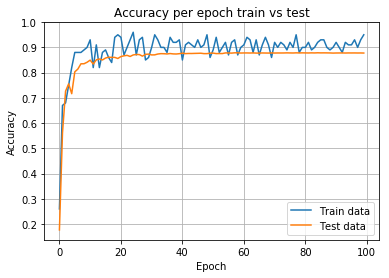

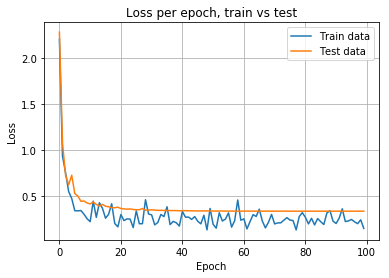

/Users/prashant/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


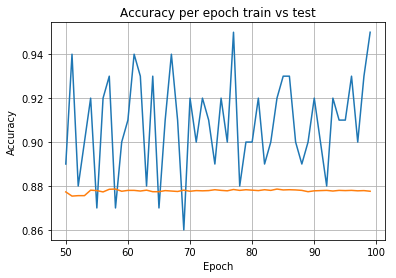

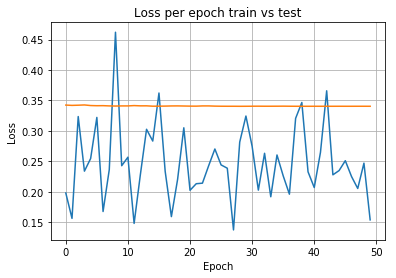

In [31]:
print('Final test accuracy ' + str(test_accuracy[-1]))
print('Final test loss ' + str(test_cost[-1]))

# accuracy training vs testing dataset
plt.plot(train_accuracy, label='Train data')
plt.xlabel('Epoch')
plt.plot(test_accuracy, label='Test data')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy per epoch train vs test')
plt.show()

# loss training vs testing dataset
plt.plot(train_cost, label='Train data')
plt.plot(test_cost, label='Test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per epoch, train vs test')
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point, int(NUM_TRAINING_ITER / NUM_EPOCH_SIZE))
plt.plot(x_range, train_accuracy[zoom_point:])
plt.plot(x_range, test_accuracy[zoom_point:])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per epoch train vs test')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_cost[zoom_point:])
plt.plot(test_cost[zoom_point:])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch train vs test')
plt.legend()
plt.grid(True)
plt.show()
